# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [3]:
# Create X and y
y = df[['SalePrice']]
X = df.drop(['Id', 'SalePrice'], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Remove "object"-type features from X
cont_features = X.select_dtypes(exclude=['object'])

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train.select_dtypes(exclude=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [4]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.impute import SimpleImputer
from IPython.core.display import HTML, Markdown

# Impute missing values with median using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_cont)
X_test_imputed = imputer.transform(X_test_cont)

In [5]:
def build_lrm(X_train, y_train, X_test, y_test, linreg):
    lrm = linreg.fit(X_train, y_train)
    y_hat_train = lrm.predict(X_train)
    y_hat_test = lrm.predict(X_test)

    # scores
    r2_train = lrm.score(X_train, y_train)
    mse_train = mean_squared_error(y_train, y_hat_train)
    r2_test = lrm.score(X_test, y_test)
    mse_test = mean_squared_error(y_test, y_hat_test)

    # Print R2 and MSE for training and test sets
    display(Markdown("$R^2_{train}=" + str(r2_train) + ", R^2_{test}=" + str(r2_test) + "$"))
    display(Markdown("$MSE_{train}=" + str(mse_train) + ", MSE_{test}=" + str(mse_test) + "$"))

    return lrm

In [6]:
build_lrm(X_train_imputed, y_train, X_test_imputed, y_test, LinearRegression())

$R^2_{train}=0.8069696279310434, R^2_{test}=0.8204073727349531$

$MSE_{train}=1212427542.2127135, MSE_{test}=1145834206.2281122$

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

build_lrm(X_train_imputed_scaled, y_train, X_test_imputed_scaled, y_test, LinearRegression())

$R^2_{train}=0.8069838506625961, R^2_{test}=0.8195876121702725$

$MSE_{train}=1212338208.9576647, MSE_{test}=1151064430.3761318$

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [8]:
# Create X_cat which contains only the categorical variables

X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])
features_cat = list(X_train_cat.columns)

# Fill missing values with the string 'missing'
X_train_cat = X_train_cat.fillna('missing')
X_test_cat = X_test_cat.fillna('missing')

- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [10]:
# Your code here
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [11]:
# Your code here
build_lrm(X_train_all, y_train, X_test_all, y_test, LinearRegression())

$R^2_{train}=0.9358945491571707, R^2_{test}=-1.2854905133070053e+19$

$MSE_{train}=402647590.50479454, MSE_{test}=8.201667431230763e+28$

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [12]:
# Your code here
lasso = build_lrm(X_train_all, y_train, X_test_all, y_test, Lasso())

$R^2_{train}=0.9358629714970873, R^2_{test}=0.8894107161847609$

$MSE_{train}=402845930.4053683, MSE_{test}=705580101.8532798$

#### With a higher regularization parameter (alpha = 10)

In [13]:
# Your code here
lasso = build_lrm(X_train_all, y_train, X_test_all, y_test, Lasso(alpha=10))

$R^2_{train}=0.9342753644760174, R^2_{test}=0.8972821169495537$

$MSE_{train}=412817721.1547933, MSE_{test}=655359107.903908$

## Ridge

#### With default parameter (alpha = 1)

In [14]:
# Your code here
ridge = build_lrm(X_train_all, y_train, X_test_all, y_test, Ridge())

$R^2_{train}=0.9231211098579946, R^2_{test}=0.884803191565686$

$MSE_{train}=482877812.56317157, MSE_{test}=734976961.8189322$

#### With default parameter (alpha = 10)

In [15]:
# Your code here
ridge = build_lrm(X_train_all, y_train, X_test_all, y_test, Ridge(alpha=10))

$R^2_{train}=0.8989918243215563, R^2_{test}=0.8835804078887326$

$MSE_{train}=634434326.9330542, MSE_{test}=742778548.0266045$

## Compare the metrics    

Write your conclusions here: 
_________________________________


## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [16]:
# Number of Ridge params almost zero
sum(sum(abs(ridge.coef_) < 10**(-10)))

0

In [17]:
# Number of Lasso params almost zero
sum(abs(lasso.coef_) < 10**(-10))

79

In [18]:
print(len(lasso.coef_))
print(sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_))

295
0.2677966101694915


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [19]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
  
    # Remove "object"-type features and SalesPrice from X
    cont_features = X.select_dtypes(exclude=['object'])
    X_train_cont = X_train.select_dtypes(exclude=['object'])
    X_test_cont = X_test.select_dtypes(exclude=['object'])

    # Impute missing values with median using SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train_cont)
    X_test_imputed = imputer.transform(X_test_cont)

    # Scale the train and test data
    ss = StandardScaler()
    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
    X_test_imputed_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    X_train_cat = X_train.select_dtypes(include=['object'])
    X_test_cat = X_test.select_dtypes(include=['object'])
    features_cat = list(X_train_cat.columns)

    # Fill nans with a value indicating that that it is missing
    X_train_cat = X_train_cat.fillna('missing')
    X_test_cat = X_test_cat.fillna('missing')

    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    columns = ohe.get_feature_names(input_features=features_cat)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [20]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


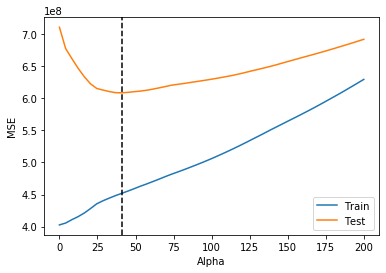

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 